## Introduction

Experiments to find distribution of fraud and non fraud data. Moreover, we worked on this case as anomaly detection and how clustering provides the corresponding results.

## Description



## Conclusions

In [34]:
import pandas as pd
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt 
import matplotlib.font_manager 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib.ticker import PercentFormatter
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from pyod.models.knn import KNN 
from sklearn.neighbors import KNeighborsClassifier as skKNN

In [2]:
def plot_cm(cm):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.heatmap(cm, annot=True,cmap="OrRd",fmt='g')
    plt.title('confusion matrix')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

In [3]:
# Reading Dataset
data = pd.read_csv("Dataset/uni_ratios_fraud.csv",sep = ';')
data.head()

,g_id,fyear,gvkey,fraud,sale_flag,at_flag,sale/at,at/sale,act/sale,act/at,...,rect/sale,rect/at,sstk/sale,sstk/at,txp/sale,txp/at,txt/sale,txt/at,xint/sale,xint/at
0,100001990,1990.0,10000.0,0.0,0,0,1.203083,0.831198,0.631982,0.760326,...,0.159846,0.192308,0.000024,0.000028,0.001105,0.001329,0.003804,0.004577,0.037299,0.044873
1,100001991,1991.0,10000.0,0.0,0,0,1.361683,0.734385,0.545042,0.742175,...,0.146434,0.199397,0.000037,0.000051,0.000922,0.001255,0.002201,0.002997,0.032109,0.043722
2,100001992,1992.0,10000.0,0.0,0,0,1.428408,0.700080,0.495408,0.707644,...,0.156451,0.223476,0.000037,0.000053,0.003290,0.004700,0.003626,0.005180,0.023040,0.032910
3,100001993,1993.0,10000.0,0.0,0,0,1.376801,0.726321,0.521222,0.717620,...,0.167717,0.230913,0.008726,0.012014,0.007921,0.010906,0.014081,0.019386,0.021179,0.029159
4,100001994,1994.0,10000.0,0.0,0,0,1.365206,0.732490,0.524201,0.715642,...,0.182585,0.249266,0.000840,0.001146,0.000000,0.000000,0.018308,0.024994,0.019176,0.026179


### Data Pre-processing

In [4]:
X = data.iloc[:,4:]  
y = data['fraud']    
X = StandardScaler().fit_transform(X)

### Feature importance Analysis

In [5]:
indexes = data.iloc[:,4:].columns

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

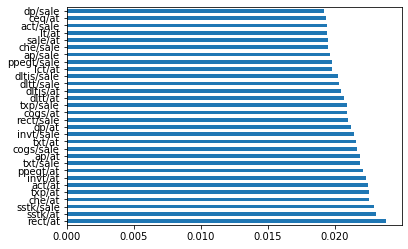

In [6]:
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=indexes)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [7]:
# feat_importances.sort_values(ascending = False)

In [8]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# #apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features

### PCA

#### Selected top 3 components for analysis

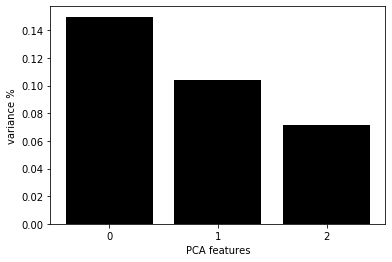

In [9]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [10]:
PCA_df = pd.DataFrame(principalComponents[:,:3],columns = ['PC1','PC2','PC3'])
PCA_df['labels'] = y
PCA_df

,PC1,PC2,PC3,labels
0,-0.215436,-0.131245,0.032869,0.0
1,-0.212142,-0.124291,0.030208,0.0
2,-0.212313,-0.116537,0.033187,0.0
3,-0.213270,-0.125924,0.031896,0.0
4,-0.216588,-0.132088,0.031868,0.0
...,...,...,...,...
146040,-0.149393,-0.128804,0.024668,0.0
146041,-0.137114,-0.104983,0.001688,0.0
146042,-0.125836,-0.093100,-0.029936,0.0
146043,-0.137478,-0.082159,-0.020371,0.0


#### Plot of PCA in 2D

##### Number of nonfraud data is so much that we can't even see fraud in the plot as shown in the following plot

In [11]:
PCA_fraud = PCA_df[PCA_df.labels == 1]
PCA_nonfraud = PCA_df[PCA_df.labels == 0]

In [31]:
def plot_2d(fraud_x,fraud_y,nonfraud_x,nonfraud_y,xlabel,ylabel):
    plt.figure(figsize =(8, 6)) 

    fraud_plot = plt.scatter(fraud_x, fraud_y,
                 c='red', cmap='autumn_r',marker = 'x',zorder=2)
    nonfraud_plot = plt.scatter(nonfraud_x, nonfraud_y,
                 c='gray', cmap='autumn_r',marker = 'o',zorder=1)
    plt.legend((fraud_plot,nonfraud_plot),['Fraud','Non Fraud'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

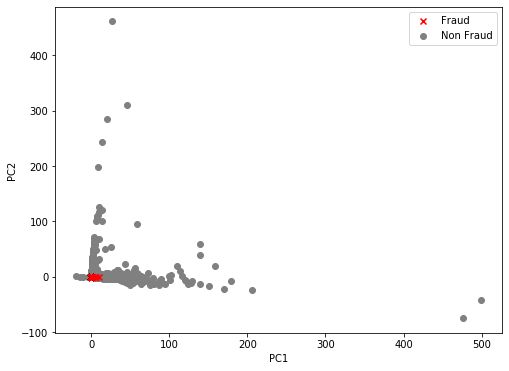

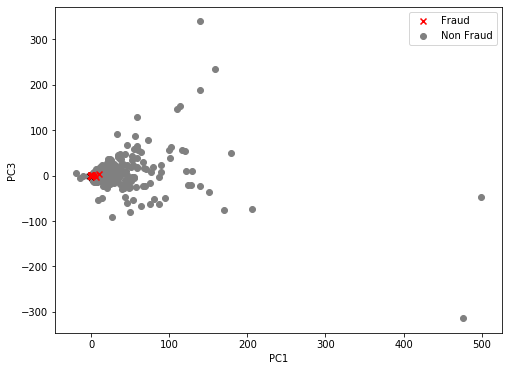

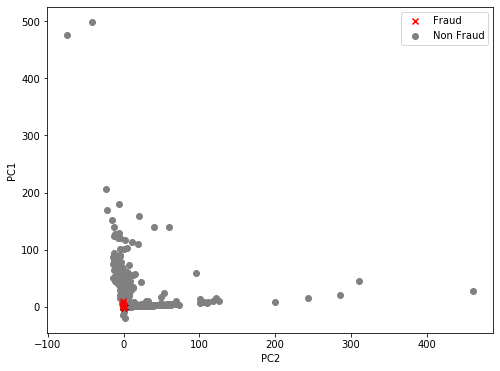

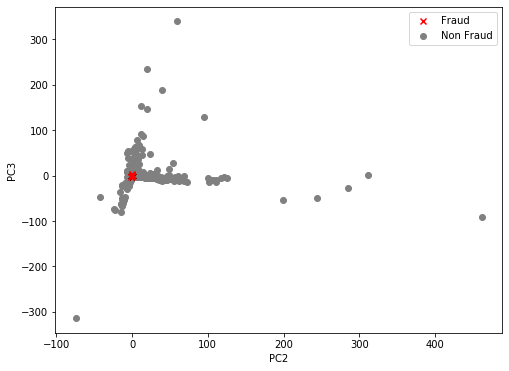

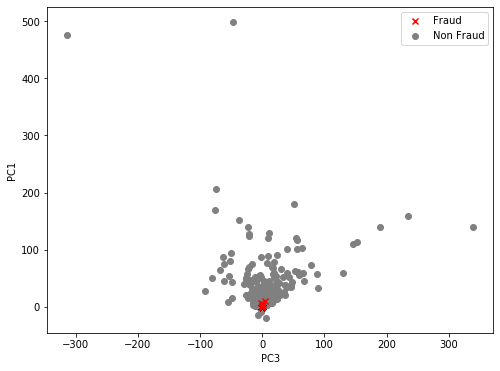

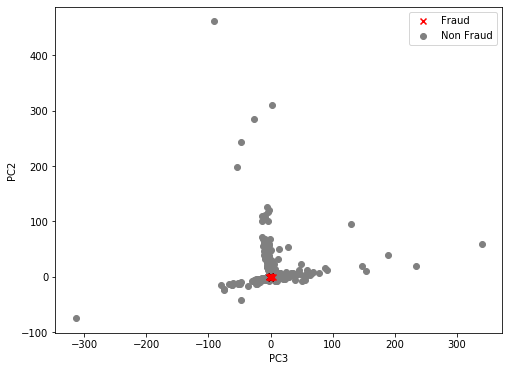

In [32]:
axes = ['PC1','PC2','PC3']
for f_axis in axes:
    for s_axis in axes:
        if f_axis == s_axis:
            continue
        plot_2d(PCA_fraud[f_axis],PCA_fraud[s_axis],PCA_nonfraud[f_axis],PCA_nonfraud[s_axis],f_axis,s_axis)

#### Creating sub dataset that is concentrated around fraud data

In [28]:
max_val = PCA_df[PCA_df['labels'] == 1].iloc[:,:3].max()
min_val = PCA_df[PCA_df['labels'] == 1].iloc[:,:3].min()

In [29]:
PCA_sub_df = PCA_df[np.all(PCA_df.iloc[:,:3] <= max_val,axis = 1) & np.all(PCA_df.iloc[:,:3] >= min_val,axis = 1)]
PCA_sub_fraud = PCA_sub_df[PCA_sub_df.labels == 1]
PCA_sub_nonfraud = PCA_sub_df[PCA_sub_df.labels == 0]

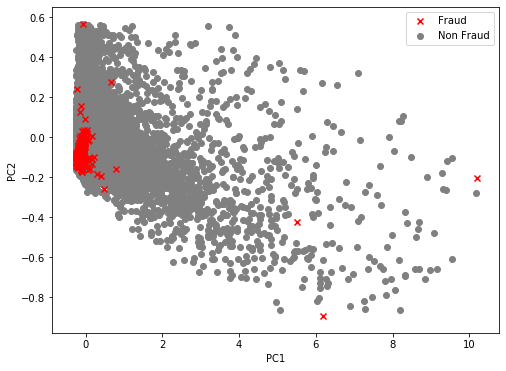

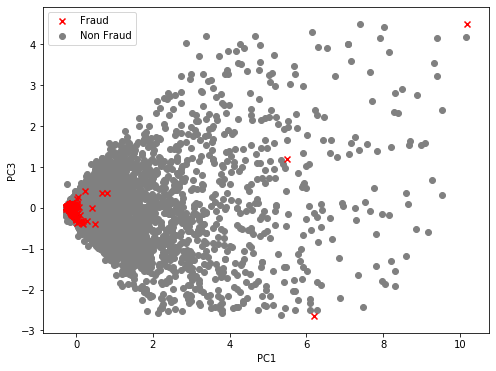

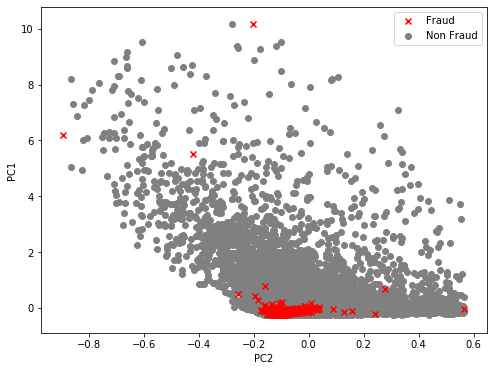

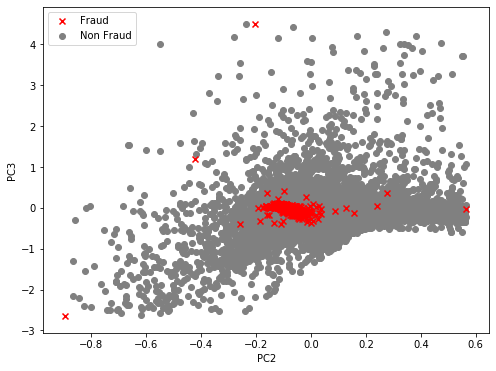

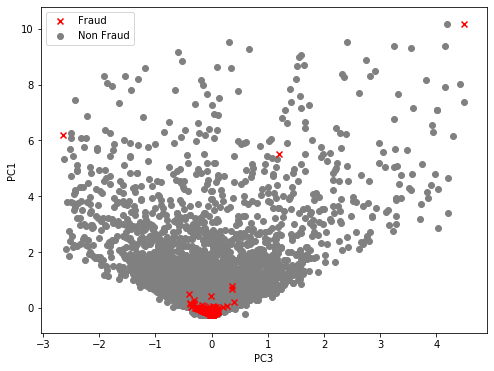

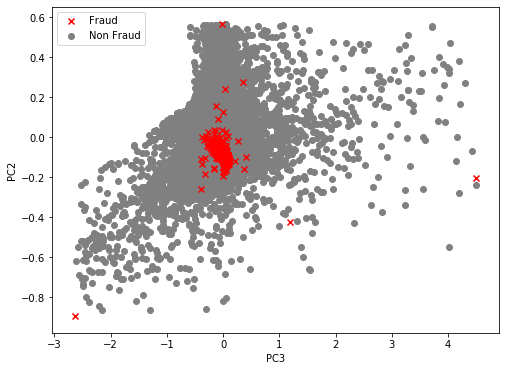

In [33]:
axes = ['PC1','PC2','PC3']
for f_axis in axes:
    for s_axis in axes:
        if f_axis == s_axis:
            continue
        plot_2d(PCA_sub_fraud[f_axis],PCA_sub_fraud[s_axis],PCA_sub_nonfraud[f_axis],PCA_sub_nonfraud[s_axis],f_axis,s_axis)

#### It seems like fraud data is not so distinguishable than non fraud data

### Plot of PCA in 3D

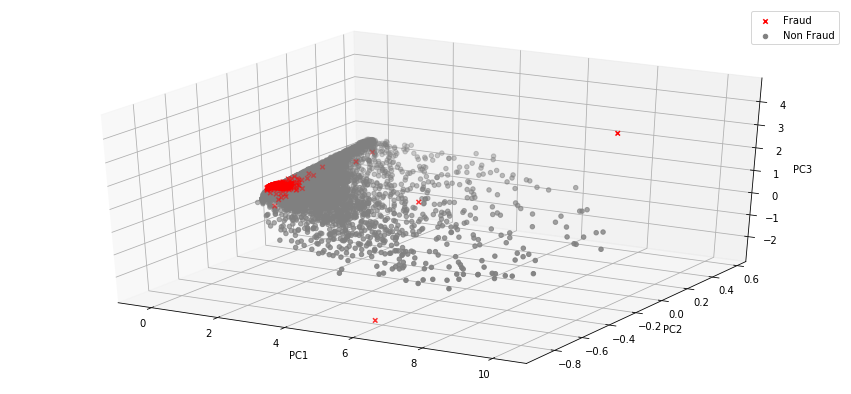

In [398]:
from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')

  
fraud_plot = ax.scatter(PCA_sub_fraud['PC1'], PCA_sub_fraud['PC2'],PCA_sub_fraud['PC3'],
             c='red', cmap='autumn_r',marker = 'x')
nonfraud_plot = ax.scatter(PCA_sub_nonfraud['PC1'], PCA_sub_nonfraud['PC2'],PCA_sub_nonfraud['PC2'],
             c='gray', cmap='autumn_r',marker = 'o')

plt.legend((fraud_plot,nonfraud_plot),['Fraud','Non Fraud'])


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In [469]:
# sns.jointplot(
#     data=PCA_sub_df,
#     x="PC1", y="PC2", color="labels",
#     kind="kde"
# )

#### It can be seen that fraud data is clustered together but there is a huge problem and that is this cluster lies directly in the non fraud data. There is no way to distinguish them. 

### Histograms

In [209]:
def bins_edges(series,bin_size,min_edge = None,max_edge = None):
    if not min_edge:
        min_edge = np.min(series)
    if not max_edge:
        max_edge = np.max(series)
    N = (max_edge-min_edge)/bin_size; Nplus1 = round(N) + 1
    bins = np.linspace(min_edge, max_edge, Nplus1)
    return bins

In [449]:
def bars(df,col,bin_size = 0.1,xmin=None,xmax=None):
    
    ser_fraud = df[col][df['labels'] == 1]
    ser_nonfraud = df[col][df['labels'] == 0]
    
    min_edge = min(np.min(ser_fraud),np.min(ser_nonfraud))
    max_edge = max(np.max(ser_fraud),np.max(ser_nonfraud))
    
    bins = bins_edges(ser_fraud,bin_size,min_edge,max_edge)
    
    
    #fraud class
    groups_fraud = ser_fraud.groupby(pd.cut(ser_fraud, bins = bins))
    tot_fraud = ser_fraud.shape[0]
    
    per_fraud = list()
    for grp in groups_fraud:
        per_fraud.append((grp[1].shape[0]/tot_fraud)*100)
    
    
    #nonfraud class
    groups_nonfraud = ser_nonfraud.groupby(pd.cut(ser_nonfraud, bins = bins))
    tot_nonfraud = ser_nonfraud.shape[0]
    
    per_nonfraud = list()
    for grp in groups_nonfraud:
        per_nonfraud.append((grp[1].shape[0]/tot_nonfraud)*100)
    
    # histogram
    str_bins = [str(round(x,2)) for x in bins]
    y_max = max(np.max(per_nonfraud),np.max(per_fraud))
    
    f = plt.figure(figsize=(20,10))
    
    # fraud histogram    
    f.add_subplot(221)
    plt.bar(str_bins[:-1],per_fraud,align = 'edge')
    plt.title('Fraud histogram for ' + col,fontsize =10)
    
    if xmin and xmax:
        plt.axis((xmin,xmax,np.min(per_nonfraud),np.max(per_nonfraud)+3))
    else:
        ymin, _ = plt.ylim()
        plt.ylim(ymin,y_max+3)
        
    plt.xticks(rotation = 90,fontsize = 6)

    
    # nonfraud histogram
    f.add_subplot(222)
    plt.bar(str_bins[:-1],per_nonfraud,align = 'edge')

    plt.title('Non Fraud histogram for ' + col,fontsize = 10)
    ymin, _ = plt.ylim()
    plt.ylim(ymin,y_max+3)
    if xmin and xmax:
        plt.axis((xmin,xmax,np.min(per_nonfraud),np.max(per_nonfraud)+3))
    else:
        ymin, _ = plt.ylim()
        plt.ylim(ymin,y_max+3)
    plt.xticks(rotation = 90,fontsize = 6)
    
    # differential histogram
    diff_per = np.array(per_fraud) - np.array(per_nonfraud)
    f.add_subplot(223)
    plt.bar(str_bins[:-1],diff_per,align = 'edge')

    plt.title('Differential histogram for ' + col,fontsize = 10)
    ymin, _ = plt.ylim()
    plt.ylim(ymin,y_max+3)
    if xmin and xmax:
        plt.axis((xmin,xmax,np.min(diff_per),np.max(diff_per)+3))
    else:
        ymin, _ = plt.ylim()
        plt.ylim(ymin,y_max+3)
    plt.xticks(rotation = 90,fontsize = 6)
        
    plt.show()
    print(f'range is {bins[0]} to {bins[-1]}')
    s_range = bins[per_fraud.index(max(per_fraud))]
    e_range = s_range + bin_size
    print(f'max percentage of fraud occurs at {round(max(per_fraud),2)} between {round(s_range,2)} - {round(e_range,2)}')
    s_range = bins[per_nonfraud.index(max(per_nonfraud))]
    e_range = s_range + bin_size
    print(f'max percentage of non fraud occurs at {round(max(per_nonfraud),2)} between {round(s_range,2)} - {round(e_range,2)}')


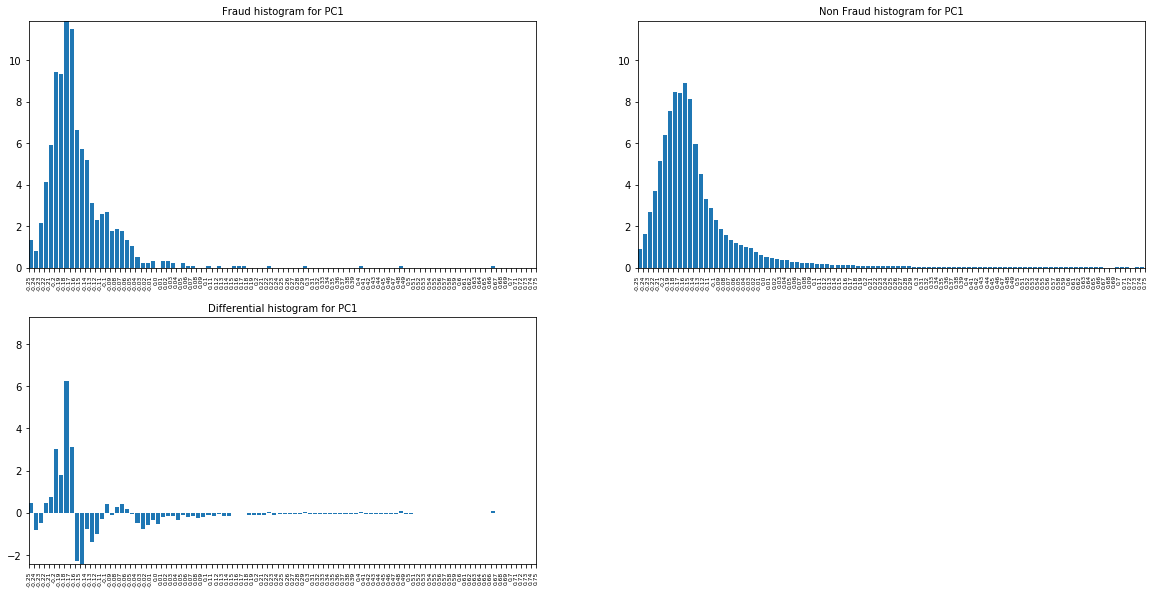

range is -0.2577751031790918 to 10.188938310397834
max percentage of fraud occurs at 14.73 between -0.18 - -0.17
max percentage of non fraud occurs at 8.91 between -0.16 - -0.15


In [450]:
# PC1
bars(PCA_sub_df,'PC1',0.01,xmin = '-0.25',xmax = '0.75')

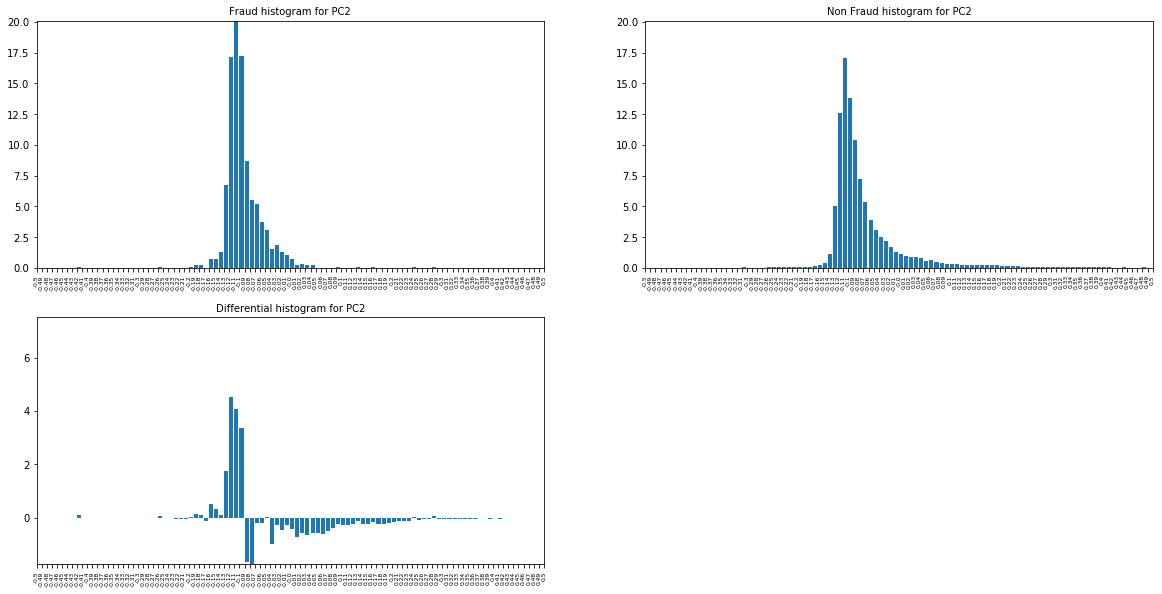

range is -0.8939125206258696 to 0.5652417601497501
max percentage of fraud occurs at 21.16 between -0.11 - -0.1
max percentage of non fraud occurs at 17.1 between -0.11 - -0.1


In [451]:
# PC2
bars(PCA_sub_df,'PC2',0.01,xmin = '-0.5',xmax = '0.5')

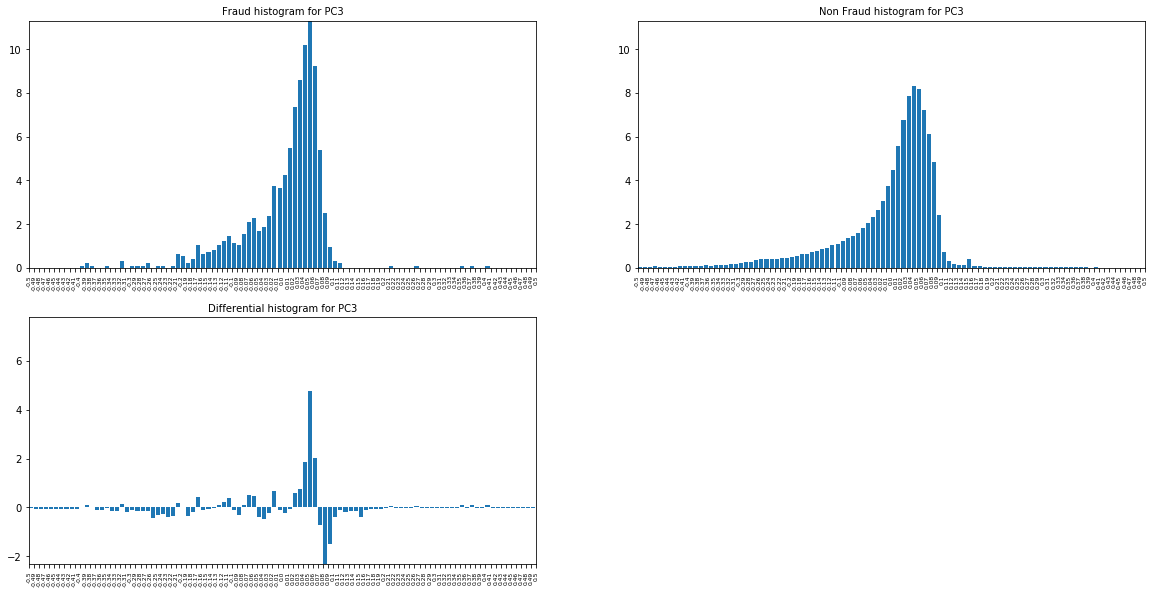

range is -2.6398365497625145 to 4.490457513205108
max percentage of fraud occurs at 12.97 between 0.05 - 0.06
max percentage of non fraud occurs at 8.3 between 0.04 - 0.05


In [452]:
# PC3
bars(PCA_sub_df,'PC3',0.01,xmin = '-0.5',xmax = '0.5')

## Anomaly Detection

### Raw data

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 42)

In [352]:
clf = KNN() 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 

C:\Users\umaid\anaconda3\lib\site-packages\pyod\models\base.py:349: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")


              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     29034
         1.0       0.01      0.09      0.01       175

    accuracy                           0.89     29209
   macro avg       0.50      0.50      0.48     29209
weighted avg       0.99      0.89      0.94     29209



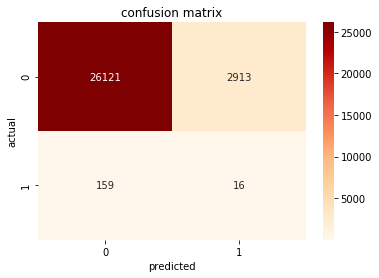

In [353]:
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
plot_cm(cm)

### Training only on fraud data

In [461]:
clf = KNN() 
clf.fit(fraud_X) 

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [462]:
y_pred = clf.predict(fraud_X) 
y_t =np.zeros(fraud_X.shape[0])
print('Accuracy on fraud data:',accuracy_score(y_t,y_pred))

Accuracy on fraud data: 0.9076763485477178


In [463]:
y_pred = clf.predict(nonfraud_X) 
y_t =np.ones(nonfraud_X.shape[0])
print('Accuracy on non fraud data:',accuracy_score(y_t,y_pred))

Accuracy on non fraud data: 0.25326541724967433


### Training only on non fraud data

In [454]:
clf = KNN() 
clf.fit(nonfraud_X) 

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [455]:
y_pred = clf.predict(nonfraud_X) 
y_t =np.zeros(nonfraud_X.shape[0])
print('Accuracy on non fraud data:',accuracy_score(y_t,y_pred))

Accuracy on non fraud data: 0.9079686519944031


In [456]:
y_pred = clf.predict(fraud_X) 
y_t =np.ones(fraud_X.shape[0])
print('Accuracy on fraud data:',accuracy_score(y_t,y_pred))

Accuracy on fraud data: 0.08402489626556017


### PCA data

In [ ]:
#### Since we found cluster using PCA, these components seems like a good idea 

In [355]:
PCAX_train, PCAX_test, PCAy_train, PCAy_test = train_test_split(PCA_df.iloc[:,:3], PCA_df['labels'], test_size = 0.20,random_state = 42)

In [442]:
# Training the classifier 
clf = KNN() 
clf.fit(PCAX_train, PCAy_train) 
y_pred = clf.predict(PCAX_test) 

C:\Users\umaid\anaconda3\lib\site-packages\pyod\models\base.py:349: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")


              precision    recall  f1-score   support

         0.0       0.99      0.90      0.95     29034
         1.0       0.00      0.02      0.00       175

    accuracy                           0.90     29209
   macro avg       0.50      0.46      0.47     29209
weighted avg       0.99      0.90      0.94     29209



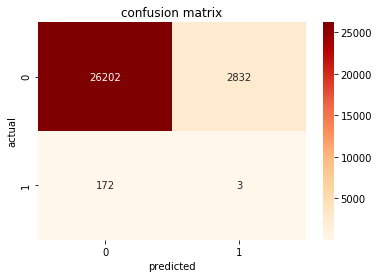

In [443]:
y_pred = clf.predict(PCAX_test) 
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
plot_cm(cm)

### Training only on fraud data

In [406]:
# Analysis with contamination
acc_list = {}
best_model = None
best_acc = -1
for cont in np.arange(0.01,0.51,0.1):
    clf = KNN(contamination = cont) 
    clf.fit(PCA_fraud.iloc[:,:3])
    
    y_pred = clf.predict(PCA_fraud.iloc[:,:3])
    y_t =np.zeros(PCA_fraud.shape[0])
    fraud_acc = accuracy_score(y_t,y_pred)
    acc_list[cont] = dict()
    acc_list[cont]['f_acc'] = fraud_acc
    
    if fraud_acc > best_acc:
        best_acc = fraud_acc
        best_model = clf
    
    y_pred = clf.predict(PCA_nonfraud.iloc[:,:3])
    y_t =np.ones(PCA_nonfraud.shape[0])
    acc_list[cont]['nf_acc'] = accuracy_score(y_t,y_pred)

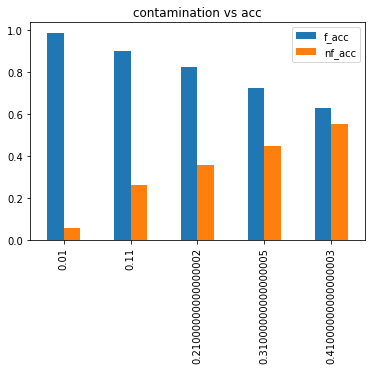

In [415]:
pd.DataFrame(acc_list).T.plot(kind = 'bar',title = 'contamination vs acc')
plt.show()

#### Best results were found at 0.5 contamination

In [401]:
clf = best_model
y_pred = clf.predict(PCA_nonfraud.iloc[:,:3])
y_t =np.ones(PCA_nonfraud.shape[0])
print('Accuracy on non fraud data:',accuracy_score(y_t,y_pred))

Accuracy on non fraud data: 0.6456875814200344


In [400]:
y_pred = clf.predict(PCA_fraud.iloc[:,:3])
y_t =np.zeros(PCA_fraud.shape[0])
print('Accuracy on fraud data:',accuracy_score(y_t,y_pred))

Accuracy on fraud data: 0.5446058091286307


### Training only on Non Fraud data

In [416]:
# Analysis with contamination
acc_list = {}
for cont in np.arange(0.01,0.51,0.1):
    clf = KNN(contamination = cont) 
    clf.fit(PCA_fraud.iloc[:,:3])
    
    y_pred = clf.predict(PCA_nonfraud.iloc[:,:3])
    y_t =np.zeros(PCA_nonfraud.shape[0])
    acc_list[cont] = dict()
    acc_list[cont]['nf_acc'] = accuracy_score(y_t,y_pred)
    
    y_pred = clf.predict(PCA_fraud.iloc[:,:3])
    y_t =np.ones(PCA_fraud.shape[0])
    acc_list[cont]['f_acc'] = accuracy_score(y_t,y_pred)

In [390]:
y_pred = clf.predict(PCA_nonfraud.iloc[:,:3])
y_t =np.zeros(PCA_nonfraud.shape[0])
print('Accuracy on non fraud data:',accuracy_score(y_t,y_pred))

Accuracy on non fraud data: 0.8136833906576326


In [391]:
y_pred = clf.predict(PCA_fraud.iloc[:,:3])
y_t =np.ones(PCA_fraud.shape[0])
print('Accuracy on fraud data:',accuracy_score(y_t,y_pred))

Accuracy on fraud data: 0.08609958506224066


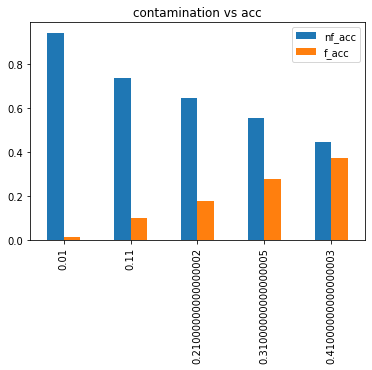

In [444]:
pd.DataFrame(acc_list).T.plot(kind = 'bar',title = 'contamination vs acc')
plt.show()